# Statystyczne metody przetwarzania danych 

## Laboratorium 4 - algorytm normalizacja, selekcja cech.


### Opis
Celem laboratorium jest przeprowadzenie normalizacji i selekcji cech.

### Termin
Zadanie należy wykonać tego samego dnia. 

### System oceniania

| Liczba punktów (procentowo) | Ocena |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Punkty ujemne</u>

* `ocena - 0.5` jeżeli zadanie wysłano po laboratorium, ale < 7 dni; 
* `ocena - 1` jeżeli zadanie wysłano w terminie pomiędzy 7 a 14 dni;
* `ocena - 1.5` jeżeli zadanie wysłano po upływie 14 dni, ale przed ostatnim laboratorium;
* `ocena = 2` jeżeli zadanie wysłano po ostatnim laboratorium.

<u>Uwaga:</u>

Niedopuszczalne jest dzielenie się notatnikiem (plik `.ipynb`) z innymi studentami ani udostępnianie go w Internecie. Każdy student powinien pobrać notatnik samodzielnie z platformy WIKAMP.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały. Prace bardzo podobne albo grupowe będą uznawane za plagiat.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab04.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość). Warstwa prezentacji danych to jeden z głównych elementów wpływających na ocenę.**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:

#### Normalizacja
* Wczytaj dane.
* Znormalizuj dane.
* Przeprowadź eksperyment z zastosowaniem algorytmu kNN lub NM dla danych znormalizowanych oraz bez normalizacji.
    * W eksperymencie wybierz minimum 5 klas oraz 10 cech.
* Przedstaw porównanie wyników klasyfikacji na danych znormalizowanych i bez normalizacji.
* Napisz wnioski.

### wczytywanie danych

In [48]:
import numpy as np
import pandas
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
train_dataframe = pandas.DataFrame(train)
test_dataframe = pandas.DataFrame(test)

### normalizacja danych


In [49]:
train_pandas_normalized = train_dataframe.copy()
test_pandas_normalized = test_dataframe.copy()

# inspiracja do tego kodu:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name==0:
            continue
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# jakies normalizowanie ze stacka
# train_pandas_normalized=(train_dataframe-train_dataframe.mean())/train_dataframe.std()
# test_pandas_normalized=(test_dataframe-test_dataframe.mean())/test_dataframe.std()

# min max normalization
# train_pandas_normalized=(train_dataframe-train_dataframe.min())/(train_dataframe.max()-train_dataframe.min())
# test_pandas_normalized=(test_dataframe-test_dataframe.min())/(test_dataframe.max()-test_dataframe.min())

train_pandas_normalized = normalize(train_dataframe)
test_pandas_normalized = normalize(test_dataframe)

### Implementacja klasyfikatora k*NN

Bez normalizacji: 
ilość dobrze oznaczonych: 297
ilość wszystkich:308
procent dokładności: 96.43%


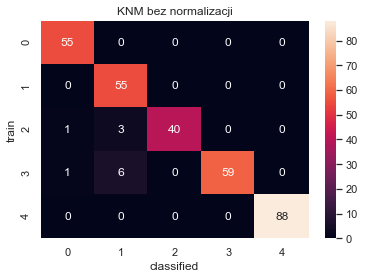

In [50]:
def get_distance(trained,tested,cechy):
    summary = 0
    for cecha in cechy:
        summary +=pow(tested[cecha]-trained[cecha],2)
    return np.sqrt(summary)

def find_k_min(k,list_to_be_searched):
    sorted_list = sorted(list_to_be_searched)
    return sorted_list[:k]

def most_frequent(list_to_be_searched):
    return max(set(list_to_be_searched), key = list_to_be_searched.count)

def k_nearest_classify(list_of_distances, list_of_k_nearest, list_of_trained_examples):
    temp_list = []
    for dist in list_of_k_nearest:
        temp_list.append(list_of_distances.index(dist))
    k_nearest_list = []
    for element in temp_list:
        k_nearest_list.append(list_of_trained_examples[element][0])
    return most_frequent(k_nearest_list)

def k_classify(list_of_trained_examples, single_tested_example, k_nearest,list_of_characteristics):
    temp_list = []
    for element in list_of_trained_examples:
        temp_list.append(get_distance(element,single_tested_example,list_of_characteristics))
    list_of_k_nearest = find_k_min(k_nearest,temp_list)
    classified = k_nearest_classify(temp_list,list_of_k_nearest,list_of_trained_examples)
    return single_tested_example, classified


# zmienne do obu przypadków (z normalizacją i bez)
list_of_characters =[2,3,4,5,6,7,8,10,11,12]
list_of_classes = [3,5,6,7,8]


list_of_classifed = []
selectedClassesTrained = train_dataframe.loc[train_dataframe[0].isin(list_of_classes),:]
selectedClassesTest = test_dataframe.loc[test_dataframe[0].isin(list_of_classes),:]
selectedClassesTrained=selectedClassesTrained.to_numpy()
selectedClassesTest=selectedClassesTest.to_numpy()
for to_be_tested in selectedClassesTest:
    list_of_classifed.append(k_classify(selectedClassesTrained,to_be_tested,10,list_of_characters))

counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("Bez normalizacji: ")
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")

import matplotlib as plt
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("KNM bez normalizacji")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()

### to samo co wyżej ale z normalizacją danych

Z normalizacją danych: 
ilość dobrze oznaczonych: 292
ilość wszystkich:308
procent dokładności: 94.81%


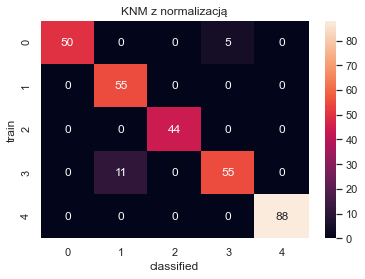

In [51]:
list_of_classifed = []
selectedClassesTrainedNorm = train_pandas_normalized.loc[train_pandas_normalized[0].isin(list_of_classes),:]
selectedClassesTestNorm = test_pandas_normalized.loc[test_pandas_normalized[0].isin(list_of_classes),:]
selectedClassesTrainedNorm=selectedClassesTrainedNorm.to_numpy()
selectedClassesTestNorm=selectedClassesTestNorm.to_numpy()
for to_be_tested in selectedClassesTestNorm:
    list_of_classifed.append(k_classify(selectedClassesTrainedNorm,to_be_tested,10,list_of_characters))

counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("Z normalizacją danych: ")
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")


# pretty printing
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("KNM z normalizacją")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()

### wnioski
Dla przypadku wybranego w eksperymencie porównawczym wyszło że normalizacja nie pomogła klasyfikatorowi
i obniżyła skuteczność dopasowania

#### Selekcja cech
* Przeprowadź selekcję cech za pomocą metod poznanych na wykładzie (np. z zastosowaniem współczynnika Fishera)
    * Wybierz 2-5 cech (ze zbioru 10 cech wybranych w poprzednim eksperymencie) i opisz dlaczego je wybrałeś.
* Przeprowadź klasyfikację na wybranych cechach.
* Porównaj wyniki klasyfikacji:
    * dla 10 cech bez normalizacji,
    * dla 10 cech z normalizacją,
    * dla 2-5 cech bez normalizacji,
    * dla 2-5 cech z normalizacją.
* Opisz wyniki i napisz wnioski.


In [52]:
import math
# przygotowanie średnich wartości dla każdej klasy
list_of_classes = [3,5]
x_features_chosen = 5

train_dataframe =  pandas.DataFrame(train)
sred_class = np.zeros((40,16))
for i in range(0,40):
    temp = train_dataframe[train_dataframe[0] == i+1]
    for j in range(0,16):
        sred_class[i][j] = temp.iloc[:, j].mean()

# test_dataframe = pandas.DataFrame(test)
# test_classes = test_dataframe[test_dataframe[0].isin(list_of_classes)]

covar_train_class1 = np.cov(train_dataframe[train_dataframe[0] == list_of_classes[0]],rowvar=False, bias=False)
covar_train_class2 = np.cov(train_dataframe[train_dataframe[0] == list_of_classes[1]],rowvar=False, bias=False)
# ma mb srednie dla roznych cech
# ca cb macierze kowariancji dla roznych cech
def fisher_FS(ma,mb,ca,cb):
    up = abs(ma-mb)
    low = math.sqrt(ca) + math.sqrt(cb)
    return up/low

def find_best_feature():
    fisherscores=[]
    for i in list_of_characters:
        fisherscores.append(fisher_FS(sred_class[list_of_classes[0],i],sred_class[list_of_classes[1],i],
                                      covar_train_class1[i,i],covar_train_class2[i,i]))
    result = []
    for a in range(x_features_chosen):
        result.append(1+fisherscores.index(max(fisherscores)))
        fisherscores[fisherscores.index(max(fisherscores))] = 0
    return result

# tutaj wybor cech przez fishera
list_of_features =find_best_feature()
print("lista cech wybranych przez selekcje: ",list_of_features)

lista cech wybranych przez selekcje:  [7, 6, 3, 5, 4]


### czemu wybrałem te cechy?
cechy te podczas wyznaczania Fisher score osiągnęły {{ x_features_chosen }} najwyższych wyników dlatego zostały wybrane do dalszych klasyfikacji

### 10 cech bez normalizacji

Bez normalizacji danych z 10 cech: 
ilość dobrze oznaczonych: 110
ilość wszystkich:110
procent dokładności: 100.00%


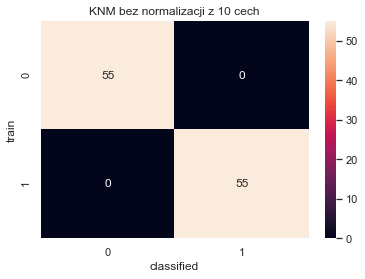

In [53]:
list_of_classifed = []
selectedClassesTrained = train_dataframe.loc[train_dataframe[0].isin(list_of_classes),:]
selectedClassesTest = test_dataframe.loc[test_dataframe[0].isin(list_of_classes),:]
selectedClassesTrained=selectedClassesTrained.to_numpy()
selectedClassesTest=selectedClassesTest.to_numpy()
for to_be_tested in selectedClassesTest:
    list_of_classifed.append(k_classify(selectedClassesTrained,to_be_tested,10,list_of_characters))

counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("Bez normalizacji danych z 10 cech: ")
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")


# pretty printing
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("KNM bez normalizacji z 10 cech")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()

### 10 cech z normalizacją

Z normalizacją danych z 10 cech: 
ilość dobrze oznaczonych: 110
ilość wszystkich:110
procent dokładności: 100.00%


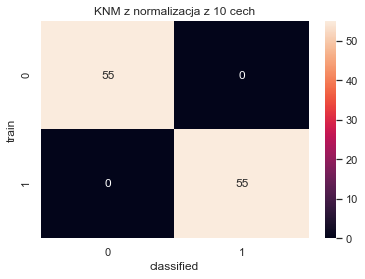

In [54]:
list_of_classifed = []
selectedClassesTrainedNorm = train_pandas_normalized.loc[train_pandas_normalized[0].isin(list_of_classes),:]
selectedClassesTestNorm = test_pandas_normalized.loc[test_pandas_normalized[0].isin(list_of_classes),:]
selectedClassesTrainedNorm=selectedClassesTrainedNorm.to_numpy()
selectedClassesTestNorm=selectedClassesTestNorm.to_numpy()
for to_be_tested in selectedClassesTestNorm:
    list_of_classifed.append(k_classify(selectedClassesTrainedNorm,to_be_tested,10,list_of_characters))

counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("Z normalizacją danych z 10 cech: ")
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")


# pretty printing
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("KNM z normalizacja z 10 cech")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()

### wybranych 5 cech bez normaliacji

Z normalizacją danych: 
ilość dobrze oznaczonych: 110
ilość wszystkich:110
procent dokładności: 100.00%


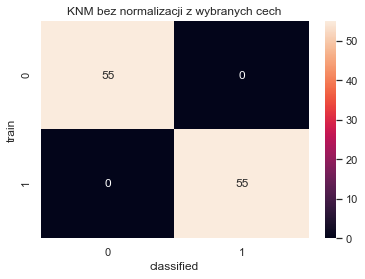

In [55]:
list_of_classifed = []
selectedClassesTrainedNorm = train_pandas_normalized.loc[train_pandas_normalized[0].isin(list_of_classes),:]
selectedClassesTestNorm = test_pandas_normalized.loc[test_pandas_normalized[0].isin(list_of_classes),:]
selectedClassesTrainedNorm=selectedClassesTrainedNorm.to_numpy()
selectedClassesTestNorm=selectedClassesTestNorm.to_numpy()
for to_be_tested in selectedClassesTestNorm:
    list_of_classifed.append(k_classify(selectedClassesTrainedNorm,to_be_tested,10,list_of_features))

counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("Z normalizacją danych: ")
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")


# pretty printing
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("KNM bez normalizacji z wybranych cech")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()

### wybranych 5 cech z normalizacją

Bez normalizacji danych z wybranych cech: 
ilość dobrze oznaczonych: 110
ilość wszystkich:110
procent dokładności: 100.00%


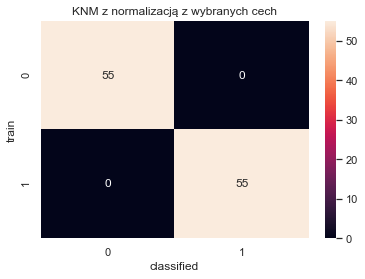

In [56]:
list_of_classifed = []
selectedClassesTrained = train_dataframe.loc[train_dataframe[0].isin(list_of_classes),:]
selectedClassesTest = test_dataframe.loc[test_dataframe[0].isin(list_of_classes),:]
selectedClassesTrained=selectedClassesTrained.to_numpy()
selectedClassesTest=selectedClassesTest.to_numpy()
for to_be_tested in selectedClassesTest:
    list_of_classifed.append(k_classify(selectedClassesTrained,to_be_tested,10,list_of_features))

counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("Bez normalizacji danych z wybranych cech: ")
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")


# pretty printing
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("KNM z normalizacją z wybranych cech")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()

Bez normalizacji danych z wybranych najgorszych cech: 
ilość dobrze oznaczonych: 82
ilość wszystkich:110
procent dokładności: 74.55%


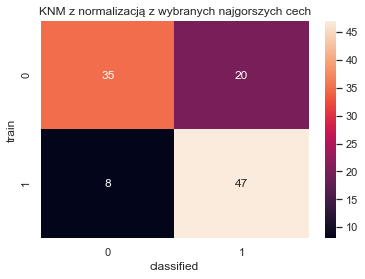

In [57]:
# 10, 11, 12 3 najgorsze cechy
list_of_classifed = []
selectedClassesTrained = train_dataframe.loc[train_dataframe[0].isin(list_of_classes),:]
selectedClassesTest = test_dataframe.loc[test_dataframe[0].isin(list_of_classes),:]
selectedClassesTrained=selectedClassesTrained.to_numpy()
selectedClassesTest=selectedClassesTest.to_numpy()
for to_be_tested in selectedClassesTest:
    list_of_classifed.append(k_classify(selectedClassesTrained,to_be_tested,10,[10,11,12]))

counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("Bez normalizacji danych z wybranych najgorszych cech: ")
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")


# pretty printing
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("KNM z normalizacją z wybranych najgorszych cech")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()

### Wnioski:
Współczynnik fishera wybiera najlepszych x cech  i faktycznie dla nich algorytm ma wręcz 100% dokładność,
 wybierając 3 najgorsze cechy w ostatnim teście widoczne jest że algorytm popełił już spore błędy podczas
 klasyfikacji próbek. Co do samej normalizacji to na testowanych przeze mnie przykładach dla 2 klas
 nie miała ona znacznego wpływu były to różnice <1% dokładności.
